# Algorithms Complexity 1

A complexity de an algorithm is a measure of the amount of computational resources required to execute the algorithm relative to the size of the problem's input. In other words, it is a measure of the time and/or space required to execute the algorithm relative to the size of the data that the algorithm needs to process.

## Case O(N)

In [27]:
def int_sum_1(n):
  sum = 0

  while n > 0:
    sum += n
    n -= 1

  return sum

Considering Cn the cost of nth line of code, we can define a cost of each line by the pair (Cn, N) where N is the number of times Cn will repeat:

```python
def int_sum_1(n):
  sum = 0       # (C1, 1)

  while n > 0:  # (C2, N)
    sum += n    # (C3, N)
    n -= 1      # (C4, N)

  return sum    # (C5, 1)
```

So we can compute the total cost by:

$C_1 \cdot 1 + C_2 \cdot N + C_3 \cdot N + C_4 \cdot N + C_5 \cdot 1 = (C_2 + C_3 + C_4) \cdot N + (C_1 + C_5)$

$\alpha = (C_2 + C_3 + C_4)$

$\beta = (C_1 + C_5)$

Now, the total of cost can be expressed by:

$f(N) = \alpha \cdot N + \beta$

Functions of this type we call **Linear Complexity** or **O(N)**


## Case O(1)

In [28]:
def int_sum_2(n):
  return n * (n + 1) / 2

The cost will be:

```python
def int_sum_2(n):
  return n * (n + 1) / 2 # ((C1, C2, C3), 1)
```
$C_1 \rightarrow$ `n + 1`

$C_2 \rightarrow$ `n * (n + 1)`

$C_3 \rightarrow$ `n * (n + 1) / 2`

So we can compute the total cost by:

$C_1 \cdot 1 + C_2 \cdot 1 + C_3 \cdot 1 = (C_1 + C_2 + C_3) \cdot 1$

$\alpha = (C_2 + C_3 + C_4)$

Now, the total of cost can be expressed by:

$f(N) = \alpha$

Functions of this type we call **Constant Complexity** or **O(1)**

```python
def foo(n):
  for i in range(10000)  # (C1, 10000)
    print(i)             # (C2, 10000)
```

This function doesn't depend on n

$C_1 \cdot 10000 + C_2 \cdot 10000 = 10000 \cdot (C_1 + C_2) = \alpha$

Now, the total of cost can be expressed by:

$f(N) = \alpha$

In this case, complexity will be **O(1)**


## Comparing O(1) vc O(N)

In [29]:
import time
import numpy as np

import matplotlib.pyplot as plt

In [30]:
numbers = np.arange(0, 10001, 1)

def compute_time(func, numbers: list):
  timers = []

  for num in numbers:
    tick = time.time()

    func(num)

    tack = time.time()

    timers.append(tack - tick)

  return timers
  

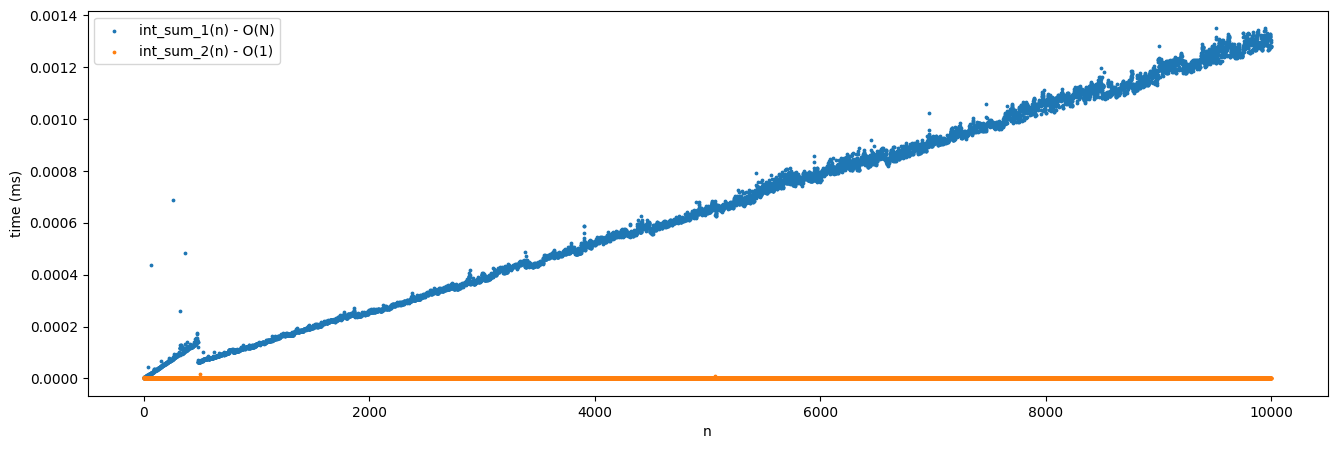

In [33]:
times_1 = compute_time(int_sum_1, numbers)
times_2 = compute_time(int_sum_2, numbers)

plt.figure(figsize=(16, 5))

plt.scatter(x=numbers, y=times_1, label="int_sum_1(n) - O(N)", s=3)
plt.scatter(x=numbers, y=times_2, label="int_sum_2(n) - O(1)", s=3)

plt.xlabel("n")
plt.ylabel("time (ms)")

plt.legend()
plt.show()

## Case O(N²)

In [1]:
def print_matrix(mat):
  for row in mat:
    for cell in row:
      print(cell)

The cost will be:

```python
def print_matrix(mat):
  for row in mat:      # (C1, N)
    for cell in row:   # (C2, (N * N))
      print(cell)      # (C3, (N * N))
```

$C_1 \cdot N + C_2 \cdot N² + C_3 \cdot N² = (C_2 + C_3) \cdot N² C_1 \cdot N$

$\alpha = (C_2 + C_3)$

$\beta = C_1$

Now, the total of cost can be expressed by:

$f(N) = \alpha \cdot N² + \beta \cdot N$

Functions of this type we call **Quadratic Complexity** or **O(N²)**

```python
def foo(n):
  sum = 0                   # (C1, 1)

  for i in range(n):        # (C2, N)
    for j in range(2 * n):  # (C3, (2 * N * N))
      sum += j              # (C4, (2 * N * N))
  
  for i in range(100 * n):  # (C5, (100 * N))
    sum += i                # (C6, (100 * N))

  for i in range(4):        # (C7, 4)
    for j in range(3):      # (C8, (4 * 3))
      sum += j              # (C9, (4 * 3))
    
  return sum                # (C10, 1)
```

$C_1 + C_2 \cdot N + C_3 \cdot 2 \cdot N² + C_4 \cdot 2 \cdot N² + C_5 \cdot 100 \cdot N + C_6 \cdot 100 \cdot N + C_7 \cdot 4 + C_8 \cdot 12 + C_9 \cdot 12 + C_{10}$

$= 2 \cdot (C_3 + C_4) \cdot N² + 100 \cdot (C_5 + C_6) \cdot N + C_2 \cdot N + 4 \cdot C_7 + 12 \cdot (C_8 + C_9) + (C_1 + C_{10})$

$= 2 \cdot (C_3 + C_4) \cdot N² + (100 \cdot (C_5 + C_6) + C_2) \cdot N + 4 \cdot C_7 + 12 \cdot (C_8 + C_9) + (C_1 + C_{10})$

$\alpha = 2 \cdot (C_3 + C_4)$

$\beta = (100 \cdot (C_5 + C_6) + C_2)$

$\gamma = 4 \cdot C_7 + 12 \cdot (C_8 + C_9) + (C_1 + C_{10})$

Now, the total of cost can be expressed by:

$f(N) = \alpha \cdot N² + \beta \cdot N + \gamma$

And te complexity of will be **O(N²)**

```python
def foo(n):
  for i in range(n + 1):  # (C1, N)
    for j in range(i):    # (C2, ?)
      print(j)            # (C3, ?)
```

To calculate this we need to tink "ow many times `print(j)` will be executed?

$1 + 2 + 3 + ... + N = \frac{N \cdot (N + 1)}{2}$

we back on **O(N²)** case


## Case O(NM)

In the case that a matrix is no quadratic

The cost will be:

```python
def print_matrix(mat):
  for row in mat:      # (C1, N)
    for cell in row:   # (C2, (N * M))
      print(cell)      # (C3, (N * M))
```

$C_1 \cdot N + C_2 \cdot N \cdot M + C_3 \cdot N \cdot M  = (C_2 + C_3) \cdot N \cdot M + C_1 \cdot N$

$\alpha = (C_2 + C_3)$

$\beta = C_1$

Now, the total of cost can be expressed by:

$f(N) = \alpha \cdot N \cdot M  + \beta \cdot N$

Functions of this type we call **O(NM)**